# 足球运动员分析案例
## 背景信息
当前，足球运动是最受欢迎的运动之一（也可以说没有之一）。

## 任务说明
我们的任务，就是在众多的足球运动员中，发现统计一些关于足球运动员的共性，或某些潜在的规律。

## 数据集描述
数据集包含的是2017年所有活跃的足球运动员。主要包括名称，年龄，国籍，所效力的俱乐部，各项技术评分，综合评分等信息。
* Name 姓名
* Nationality 国籍
* National_Position 国家队位置
* National_Kit 国家队号码
* Club 所在俱乐部
* Club_Position 所在俱乐部位置
* Club_Kit 俱乐部号码
* Club_Joining 加入俱乐部时间
* Contract_Expiry 合同到期时间
* Rating 评分
* Height 身高
* Weight 体重
* Preffered_Foot 擅长左（右）脚
* Birth_Date 出生日期
* Age 年龄
* Preffered_Position 擅长位置
* Work_Rate 工作效率
* Weak_foot 非惯用脚使用频率
* Skill_Moves 技术等级
* Ball_Control 控球技术
* Dribbling 盘球（带球）能力
* Marking 盯人能力
* Sliding_Tackle 铲球
* Standing_Tackle 逼抢能力
* Aggression 攻击能力
* Reactions 反击
* Attacking_Position 攻击性跑位
* Interceptions 抢断
* Vision 视野
* Composure 镇静
* Crossing 下底传中
* Short_Pass 短传
* Long_Pass 长传
* Acceleration 加速度
* Speed 速度
* Stamina 体力
* Strength 强壮
* Balance 平衡
* Agility 敏捷度
* Jumping 跳跃
* Heading 投球
* Shot_Power 射门力量
* Finishing 射门
* Long_Shots 远射
* Curve 弧线
* Freekick_Accuracy 任意球精准度
* Penalties 点球
* Volleys 凌空能力
* GK_Positioning 门将位置感
* GK_Diving 扑救能力
* GK_Kicking 门将踢球能力
* GK_Handling 扑球脱手几率
* GK_Reflexes 门将反应度

## 程序实现
### 导入相关的库
导入需要的库，同时，进行一些初始化的设置。

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# 图形支持中文显示
mpl.rcParams["font.family"] = "SimHei"
# 使用非Unicode的负号。（当使用中文字体时，需要设置）
mpl.rcParams["axes.unicode_minus"]=False

### 加载相关的数据集
* 加载相关的数据集（注意原数据集中是否存在标题），并查看数据的大致情况。
* 可以使用head / tail，也可以使用sample。
* 行与列没有显式完整，我们可以进行设置调整。

In [2]:
player = pd.read_csv("./data/FullData.csv", header=0)
# 在载入数据集之后，可以通过head，tail，sample来大致查看下数据集的基本情况。
# player.head()
# player.tail()
# player.sample(10)

# 注意：数据集列数较多，没有显式完整（显示...）。我们可以通过设置显式完整的列。
# 设置最多显示的列数。
pd.set_option("display.max_columns", 100)
# 设置最多显示的行数。
# pd.set_option("display.max_rows", 200)
player


,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185 cm,80 kg,Right,02/05/1985,32,LW/ST,High / Low,4,5,93,92,22,23,31,63,96,94,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170 cm,72 kg,Left,06/24/1987,29,RW,Medium / Medium,4,4,95,97,13,26,28,48,95,93,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174 cm,68 kg,Right,02/05/1992,25,LW,High / Medium,5,5,95,96,21,33,24,56,88,90,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182 cm,85 kg,Right,01/24/1987,30,ST,High / Medium,4,4,91,86,30,38,45,78,93,92,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193 cm,92 kg,Right,03/27/1986,31,GK,Medium / Medium,4,1,48,30,10,11,10,29,85,12,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,91,89,95,90,89
5,De Gea,Spain,GK,1.0,Manchester Utd,GK,1.0,07/01/2011,2019.0,90,193 cm,82 kg,Right,11/07/1990,26,GK,Medium / Medium,3,1,31,13,13,13,21,38,88,12,30,68,60,17,31,32,56,56,25,64,43,57,67,21,31,13,12,21,19,40,13,86,88,87,85,90
6,Robert Lewandowski,Poland,LS,9.0,FC Bayern,ST,9.0,07/01/2014,2021.0,90,185 cm,79 kg,Right,08/21/1988,28,ST,High / Medium,4,3,87,85,25,19,42,80,88,89,39,78,87,62,83,65,79,82,79,84,79,78,84,85,86,91,82,77,76,81,86,8,15,12,6,10
7,Gareth Bale,Wales,RS,11.0,Real Madrid,RW,11.0,09/02/2013,2022.0,90,183 cm,74 kg,Left,07/16/1989,27,RW,High / Medium,3,4,88,89,51,52,55,65,87,86,59,79,85,87,86,80,93,95,78,80,65,77,85,86,91,87,90,86,85,76,76,5,15,11,15,6
8,Zlatan Ibrahimović,Sweden,NaN,NaN,Manchester Utd,ST,9.0,07/01/2016,2017.0,90,195 cm,95 kg,Right,10/03/1981,35,ST,Medium / Low,4,4,90,87,15,27,41,84,85,86,20,83,91,76,84,76,69,74,75,93,41,86,72,80,93,90,88,82,82,91,93,9,13,10,15,12
9,Thibaut Courtois,Belgium,GK,1.0,Chelsea,GK,13.0,07/26/2011,2019.0,89,199 cm,91 kg,Left,05/11/1992,24,GK,Medium / Medium,3,1,23,13,11,16,18,23,81,13,15,44,52,14,32,31,46,52,38,70,45,61,68,13,36,14,17,19,11,27,12,86,84,69,91,89


### 数据探索与清洗
查看缺失值，异常值与重复值。
1. 通过info来查看数据缺失信息。然后可以通过isnull, any, dropna，fillna等方法对缺失值进行处理。
2. 通过describe查看数据分布情况（可使用箱线图进行辅助）。
3. 使用duplicate检查重复值。

In [3]:
# 查看缺失值信息。
# player.info()
# 通过查看，发现National_Position（国家队位置）与National_Kit（国家队号码）存在大量缺失值。通过分析，发现，该缺失值
# 属于正常现象，非数据集的不完整性。（仅有少部分队员才能入选国家队）
# 发现缺失值（结果为True，所以存在缺失值）
# player["Club_Position"].isnull().any()
# 找出缺失值记录
# player[player["Club_Position"].isnull()]
# 对缺失值进行过滤。
player = player[player["Club_Position"].notnull()]
# 再次调用info，查看空值过滤的结果。
player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17587 entries, 0 to 17587
Data columns (total 53 columns):
Name                  17587 non-null object
Nationality           17587 non-null object
National_Position     1075 non-null object
National_Kit          1075 non-null float64
Club                  17587 non-null object
Club_Position         17587 non-null object
Club_Kit              17587 non-null float64
Club_Joining          17587 non-null object
Contract_Expiry       17587 non-null float64
Rating                17587 non-null int64
Height                17587 non-null object
Weight                17587 non-null object
Preffered_Foot        17587 non-null object
Birth_Date            17587 non-null object
Age                   17587 non-null int64
Preffered_Position    17587 non-null object
Work_Rate             17587 non-null object
Weak_foot             17587 non-null int64
Skill_Moves           17587 non-null int64
Ball_Control          17587 non-null int64
Dribbling      

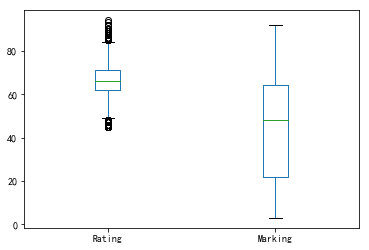

In [5]:
# 查看异常值。

# 通过describe进行整体查看。
player.describe()
# 还可以使用箱线图辅助查看。
player[["Rating", "Marking"]].plot(kind="box")

In [6]:
# 处理重复值

# 发现重复值
player.duplicated().any()
# 通过发现没有重复值。

# 如果具有重复值，可以先查看下重复的数据是什么。
# player[player.duplicated()]
# 如果查看重复值，希望显示所有重复的记录。（例如，某记录重复3次，需要全部显示）
# player[player.duplicated(keep=False)]
# 假设具有重复值，删除重复值。(可以通过keep来指定删除的方式。【first，last，False】)
# player.drop_duplicates(inplace=True)

False

### 将身高与体重处理成数值类型，便于分析。
处理的方式可以有多种，例如，使用矢量化字符串相关操作（替换，正则提取），map，apply等。

In [7]:
# 使用矢量化字符串的方式。
player["Height"] = player["Height"].str.replace("cm", "")
player["Weight"] = player["Weight"].str.replace("kg", "")
# player["Height"] = player["Height"].str.replace("cm", "").astype(np.int)
# player.head()
# player.info()
# 注意：进行替换之后，身高与体重依然是Object类型（依然不是数值类型），我们替换之后，需要进一步实现类型转换。
player["Height"] = player["Height"].astype(np.int)
player["Weight"] = player["Weight"].astype(np.int)
# player.info()

# 使用map或apply的方式。
# def transform(v):
#     return v.replace("cm", "")

# player["Height"] = player["Height"].map(lambda v: v.replace("cm", ""))
# player["Weight"] = player["Weight"].map(lambda v: v.replace("kg", ""))
player.head()

d:\soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
d:\soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
d:\soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185,80,Right,02/05/1985,32,LW/ST,High / Low,4,5,93,92,22,23,31,63,96,94,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170,72,Left,06/24/1987,29,RW,Medium / Medium,4,4,95,97,13,26,28,48,95,93,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174,68,Right,02/05/1992,25,LW,High / Medium,5,5,95,96,21,33,24,56,88,90,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182,85,Right,01/24/1987,30,ST,High / Medium,4,4,91,86,30,38,45,78,93,92,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193,92,Right,03/27/1986,31,GK,Medium / Medium,4,1,48,30,10,11,10,29,85,12,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,91,89,95,90,89


### 运动员的身高，体重，评分信息分布。

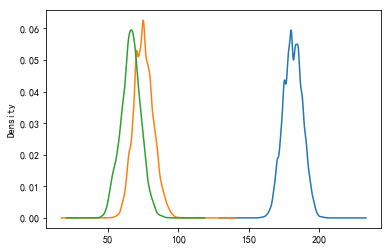

In [8]:
# 通过直方图进行查看数据的分布。
# player["Height"].plot(kind="hist", bins=15)
# player["Weight"].plot(kind="hist", bins=15)
# player["Rating"].plot(kind="hist", bins=15)
# 通过核密度图进行查看数据的分布。
player["Height"].plot(kind="kde")
player["Weight"].plot(kind="kde")
player["Rating"].plot(kind="kde")

# 结论：运动员的身高，体重与评分服从正态分布。

### 左脚与右脚选手在数量上是否存在偏差？

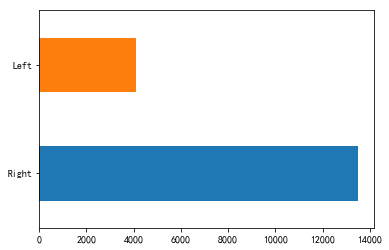

In [9]:
# 根据Preffered_Foot进行分组，然后统计每组的数量
# g = player.groupby("Preffered_Foot")
# type(g), type(g["Preffered_Foot"])
# type(g["Preffered_Foot"].count())
# s = g["Preffered_Foot"].count()
# display(s)
# s.plot(kind="bar")

# 对于上面的操作，其实就是针对Preffered_Foot分组，然后统计每组的数量。
# 我们可以使用Series的value_counts进行简化的操作。
player["Preffered_Foot"].value_counts().plot(kind="barh")

### 从球员平均评分上考虑，拥有top10评分能力的俱乐部 / 国家。【超过20人】

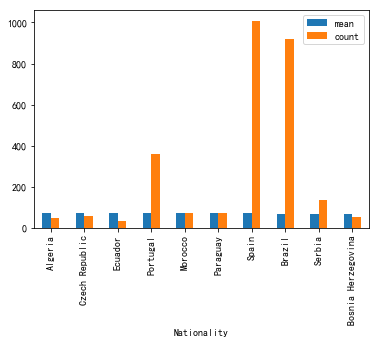

In [10]:
# 哪个俱乐部球员的评分（平局分）最高。
g = player.groupby("Club")
# 对结果进行排序。（降序）
# g["Rating"].mean().sort_values(ascending=False).head(10)
# g["Rating"].agg(["mean", "count"]).sort_values("mean", ascending=False)
# g["Rating"].agg(["mean", "count"]).sort_values("mean", ascending=False).head(10).plot(kind="bar")

# 哪个国家队球员的评分（平均分）最高。
g = player.groupby("Nationality")
result = g["Rating"].agg(["mean", "count"]).sort_values("mean", ascending=False)
result = result[result["count"] > 20]
result.head(10).plot(kind="bar")

### 哪个俱乐部更有能力留住球员（5年及以上）？

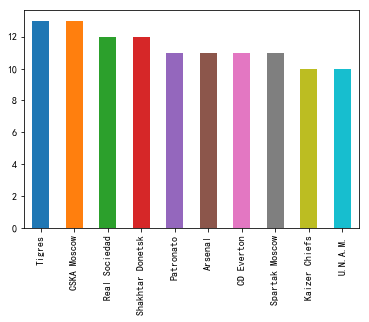

In [12]:
# 取出加入俱乐部的年份时间。
t = player["Club_Joining"].map(lambda v : v.split("/")[-1])
# 进行类型转换，转换成数值类型（int）。
t = t.astype(np.int64)
# 数据集增加1列，该列为工作年限（为俱乐部效力的时间）。
# player["work_year"] = 2017 - t
s = 2017 - t
s >= 5
# 过滤掉工作年限小于5年的记录。
# p = player[player["work_year"] >= 5]
p = player[s >= 5]
# p.groupby("Club")["Club"].count()
# 注意，结果中，俱乐部存在Free Agents（自由身），该值不应该参与统计。
p = p[p["Club"] != "Free Agents"]
p["Club"].value_counts(ascending=False).head(10).plot(kind="bar")


### 足球运动员是否与出生日期相关？
1. 全体运动员
2. 知名运动员（80分及以上）

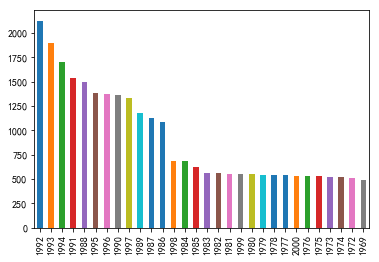

In [15]:
# 全体运动员
# t = player["Birth_Date"].str.split("/", expand=True)
# t[0].value_counts().sort_values(ascending=False).plot(kind="bar")
# t[1].value_counts().sort_values(ascending=False).plot(kind="bar")
# t[2].value_counts().sort_values(ascending=False).plot(kind="bar")

# 80分以上的运动员
t = player[player["Rating"] >= 80]
t = player["Birth_Date"].str.split("/", expand=True)
t[0].value_counts().sort_values(ascending=False).plot(kind="bar")
t[1].value_counts().sort_values(ascending=False).plot(kind="bar")
t[2].value_counts().sort_values(ascending=False).plot(kind="bar")

### 身高与体重是否具有相关性？
1. 可使用散点图进行辅助。
2. 相关系数。

In [1]:
# 通过散点图来查看变量之间的关系。
# 身高与体重具有直接关联。（正相关。）
# player.plot(kind="scatter", x="Height", y="Weight")
# 身高与评分没有直接关系。
# player.plot(kind="scatter", x="Height", y="Rating")
# player["Height"].corr(player["Weight"])
# 自己与自己，完全正相关。相关系数为1。
# player["Height"].corr(player["Height"])
# player["Height"].corr(player["Rating"])

### 哪些指标对评分的影响最大？

In [16]:
player.corr()

,National_Kit,Club_Kit,Contract_Expiry,Rating,Height,Weight,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
National_Kit,1.000000,0.055408,-0.027211,-0.084289,-0.101229,-0.093795,-0.103583,0.027268,0.105903,0.046644,0.093836,-0.162083,-0.152251,-0.148329,-0.073288,-0.058696,0.124641,-0.154804,0.076988,-0.016093,0.045986,0.036071,-0.006230,0.079866,0.056282,0.003828,-0.099086,0.089038,0.085691,-0.100935,-0.072020,0.083610,0.138914,0.109168,0.081888,0.106621,0.095289,0.117381,-0.031492,-0.012435,-0.015472,-0.024611,-0.018816
Club_Kit,0.055408,1.000000,0.077060,-0.172710,-0.028711,-0.072341,-0.198230,-0.037234,0.006378,-0.071067,-0.028584,-0.105522,-0.094920,-0.104446,-0.121709,-0.148887,-0.031746,-0.125007,-0.071177,-0.117220,-0.067383,-0.085123,-0.100525,-0.006315,-0.010092,-0.101258,-0.141140,0.010762,-0.036128,-0.106797,-0.076264,-0.051829,-0.007898,-0.040658,-0.053631,-0.062077,-0.016220,-0.020482,0.004684,0.011290,0.008788,0.006725,0.007480
Contract_Expiry,-0.027211,0.077060,1.000000,0.047430,-0.080641,-0.053049,-0.118370,0.004865,0.044511,0.035324,0.048664,0.015409,0.011482,0.008307,-0.010361,0.051309,0.043698,0.006995,0.028113,0.005840,0.012553,0.034513,0.016371,0.071003,0.079394,0.053830,-0.012495,0.046095,0.047667,0.002805,0.026235,0.021477,0.032341,0.028781,0.010840,0.007001,0.020878,0.025120,-0.027994,-0.026117,-0.023273,-0.023064,-0.024923
Rating,-0.084289,-0.172710,0.047430,1.000000,0.046937,0.139703,0.458098,0.226263,0.251926,0.463211,0.368565,0.236843,0.215385,0.249156,0.404422,0.828329,0.354501,0.319504,0.489277,0.613612,0.401851,0.496239,0.483217,0.206392,0.224253,0.355335,0.369045,0.087811,0.283309,0.289840,0.343265,0.441773,0.328576,0.419517,0.420796,0.399575,0.339898,0.386494,-0.018586,-0.027615,-0.031696,-0.021343,-0.022978
Height,-0.101229,-0.028711,-0.080641,0.046937,1.000000,0.758208,0.076727,-0.180431,-0.431177,-0.402596,-0.483545,-0.042485,-0.069602,-0.054282,-0.049009,-0.016407,-0.419544,-0.050358,-0.359610,-0.169460,-0.471327,-0.356768,-0.323575,-0.521688,-0.451128,-0.293564,0.537223,-0.799775,-0.611198,-0.063048,0.005367,-0.273413,-0.347154,-0.364182,-0.423115,-0.380217,-0.321246,-0.333576,0.358795,0.357683,0.356070,0.359746,0.360260
Weight,-0.093795,-0.072341,-0.053049,0.139703,0.758208,1.000000,0.223432,-0.135402,-0.375163,-0.338460,-0.412959,-0.030512,-0.062312,-0.047097,0.017366,0.079019,-0.344840,-0.028947,-0.283098,-0.083541,-0.389293,-0.299264,-0.261611,-0.465558,-0.404240,-0.241365,0.613829,-0.680791,-0.535404,0.005842,0.019235,-0.188739,-0.281775,-0.274446,-0.343380,-0.293956,-0.246189,-0.258932,0.342502,0.340775,0.339505,0.341829,0.341785
Age,-0.103583,-0.198230,-0.118370,0.458098,0.076727,0.223432,1.000000,0.086137,-0.016088,0.082875,0.004575,0.131425,0.096679,0.116847,0.259413,0.456724,0.073873,0.192667,0.189982,0.355588,0.134576,0.127537,0.179109,-0.175966,-0.168440,0.070685,0.329289,-0.100131,-0.019459,0.168694,0.137785,0.151174,0.064487,0.149635,0.139101,0.195338,0.131469,0.133950,0.122371,0.105158,0.109931,0.113216,0.106979
Weak_foot,0.027268,-0.037234,0.004865,0.226263,-0.180431,-0.135402,0.086137,1.000000,0.336905,0.367420,0.363398,0.026950,0.025865,0.043656,0.134120,0.207098,0.354699,0.058148,0.352235,0.316486,0.324117,0.338919,0.298103,0.257156,0.240919,0.228619,-0.004841,0.253466,0.306049,0.064655,0.190847,0.334897,0.361983,0.365637,0.359044,0.345745,0.340757,0.366610,-0.232109,-0.236372,-0.230924,-0.233080,-0.235275
Skill_Moves,0.105903,0.006378,0.044511,0.251926,-0.431177,-0.375163,-0.016088,0.336905,1.000000,0.727123,0.762623,0.032811,0.043037,0.070841,0.230424,0.223236,0.719577,0.067407,0.591623,0.490854,0.644761,0.628088,0.515631,0.619623

### 假设因为数据源的不确定性，我们没有获得后2列的具体含义是什么（未知列），分析该标题可能的含义。

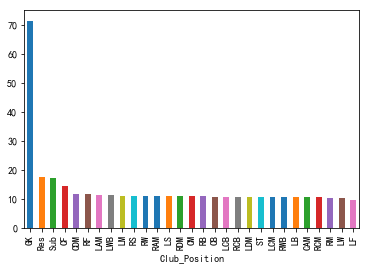

In [18]:
g = player.groupby("Club_Position")
# g["GK_Handling"].mean().sort_values(ascending=False).plot(kind="bar")
g["GK_Reflexes"].mean().sort_values(ascending=False).plot(kind="bar")

### 年龄与评分具有怎样的关系？

d:\soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


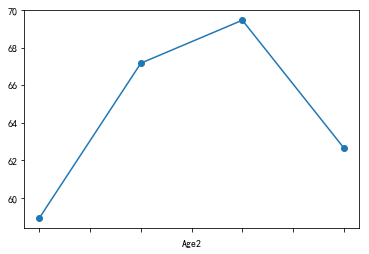

In [17]:
# player.plot(kind="scatter", x="Age", y="Rating")
# player["age"]

# cut 将连续的值切分称离散的区间表示。bins表示切分成几个区间。
# 默认情况下，值会显示对应的区间数值范围。我们可以通过labels来设置显示标签的内容。
# player["Age2"] = pd.cut(player["Age"], bins=4, labels=["初出茅庐", "快速成长", "成熟稳定", "衰退期"])
# player.groupby("Age2")["Rating"].mean().plot(kind="line")

# bins如果指定整数值，则为设置区间的个数，区间是进行等分的。如果我们需要自己指定区间范围，我们可以为bins参数
# 指定一个列表。
player["Age2"] = pd.cut(player["Age"], bins=[0, 20, 30, 40, 100], labels=["初出茅庐", "快速成长", "成熟稳定", "衰退期"])
player.groupby("Age2")["Rating"].mean().plot(kind="line", marker="o")

## 总结
自行总结，编写分析报告与结论。